<a href="https://colab.research.google.com/github/sohambharadwaj/major_project/blob/main/final_car_so.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Car-Price-Prediction/master/car%20data.csv')

In [ ]:
df.shape

(301, 9)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
dummies = pd.get_dummies(df.Car_Name)
dummies.head(3)

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,Honda CB Hornet 160R,Honda CB Shine,Honda CB Trigger,Honda CB Unicorn,Honda CB twister,Honda CBR 150,Honda Dream Yuga,Honda Karizma,...,Yamaha FZ 16,Yamaha FZ S,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.concat([df,dummies],axis='columns')
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,...,Yamaha FZ 16,Yamaha FZ S,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
final_dataset = df2.drop('Car_Name',axis='columns')


In [ ]:

final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,...,Yamaha FZ 16,Yamaha FZ S,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
final_dataset['Current Year']=2021

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,...,Yamaha FZ S,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2021


In [ ]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,...,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2021,7


In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,Honda CB Hornet 160R,...,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2021,7


In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,Honda CB Hornet 160R,Honda CB Shine,Honda CB Trigger,Honda CB Unicorn,...,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2021,7,1,0,0,1


In [ ]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)


In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,Honda CB Hornet 160R,Honda CB Shine,Honda CB Trigger,Honda CB Unicorn,...,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,1,0,1
1,4.75,9.54,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,0,1
2,7.25,9.85,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,1
3,2.85,4.15,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,0,1,0,1
4,4.60,6.87,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,1


In [ ]:

X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,Honda CB Hornet 160R,Honda CB Shine,Honda CB Trigger,Honda CB Unicorn,Honda CB twister,...,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,1,0,1
1,9.54,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,0,1
2,9.85,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,1
3,4.15,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,0,1,0,1
4,6.87,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[3.23086632e-01 2.94368562e-02 6.40683295e-05 2.27798359e-05
 1.38043948e-07 4.22545679e-07 2.65997897e-06 1.20846384e-06
 1.79960264e-07 9.27439615e-06 1.50681521e-06 4.00621193e-08
 4.26489054e-08 2.78850333e-07 9.98707331e-06 2.36337865e-06
 5.05180125e-07 5.37902074e-06 2.90847741e-06 4.68000673e-06
 3.41765349e-06 1.19036773e-06 9.31550633e-07 4.61026950e-06
 5.01700649e-07 8.76343407e-07 4.35975686e-07 9.00636862e-08
 1.66734518e-07 1.69190850e-06 1.01895168e-06 1.02653659e-07
 7.03783279e-08 7.63792922e-07 1.70231129e-07 1.82828466e-06
 7.84707261e-07 1.43479732e-06 1.71024458e-06 7.27713676e-07
 2.51613313e-05 1.73725647e-08 1.39413899e-05 1.70110163e-05
 2.19520207e-06 2.10354222e-05 4.84998510e-06 6.09538245e-06
 6.35532503e-06 1.40124372e-04 2.00397624e-05 5.21055040e-05
 3.65383506e-05 2.07597215e-07 3.77805790e-06 1.23964357e-06
 3.87900117e-07 1.29787558e-07 1.07144718e-07 1.74798148e-05
 6.29105105e-07 4.60563662e-06 1.11702891e-06 1.55115437e-06
 5.85008195e-07 5.208838

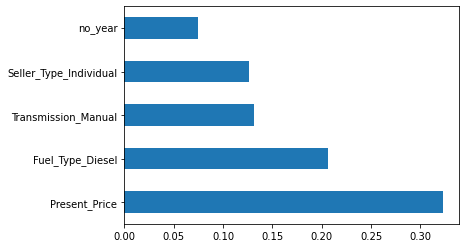

In [ ]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8786608830929938

In [ ]:
import numpy as np

In [ ]:
def predict_price(Car_Name,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual):    
    loc_index = np.where(X.columns==Car_Name)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Present_Price
    x[1] = Kms_Driven
    x[2] = Owner
    x[3] = no_year
    x[4] = Fuel_Type_Diesel
    x[5] = Fuel_Type_Petrol
    x[6]= Seller_Type_Individual
    x[7]=Transmission_Manual

    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', '800', 'Activa 3g', 'Activa 4g',
       'Bajaj  ct 100', 'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220',
       ...
       'sx4', 'verna', 'vitara brezza', 'wagon r', 'xcent', 'no_year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)

In [ ]:
predict_price('Bajaj Avenger 150',5.59,27000,0,7,0,1,0,1)

6.261813783333665